# Video Game Sales Analysis

## Scopul proiectului

Acest proiect urmareste vanzarile a mai multor jocuri video pe parcursul anilor si analizeaza diferite tendinte si factori care influenteaza aceste vanzari.

## Biblioteci necesare



In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Citirea fisierului CSV care contine baza de date

In [24]:
ds=pd.read_csv('dataset/vgchartz-2024.csv')
ds

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


## Depistarea valorilor lipsa

In [25]:
missing_values = ds.isnull().sum()
missing_values

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

## Completarea valorilor numerice lipsa folosind interpolarea

In [26]:
ds = ds.interpolate(method='linear', limit_direction='forward')
ds

/var/folders/l1/9lz4qt3s263d473lswq3flw80000gn/T/ipykernel_55364/379138119.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ds = ds.interpolate(method='linear', limit_direction='forward')


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.40,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.60,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,8.85,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,8.00,0.00,0.00,0.00,0.00,0.00,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,8.00,0.00,0.00,0.00,0.00,0.00,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,8.00,0.00,0.00,0.00,0.00,0.00,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,8.00,0.00,0.00,0.00,0.00,0.00,2019-02-28,2019-02-24


## Verificam daca exista date duplicate

In [27]:
ds.duplicated().any()

np.False_

## Descrierea bazei de date

In [28]:
ds.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,64016.000000,64016.000000,64016.000000,64016.000000,64016.000000,64016.000000
mean,7.045890,0.103192,0.057328,0.030008,0.033071,0.010588
std,1.305609,0.466999,0.244873,0.089504,0.186181,0.064353
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.300000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.277972,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.975269,0.020000,0.010000,0.010000,0.002500,0.000000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


## Histograma 

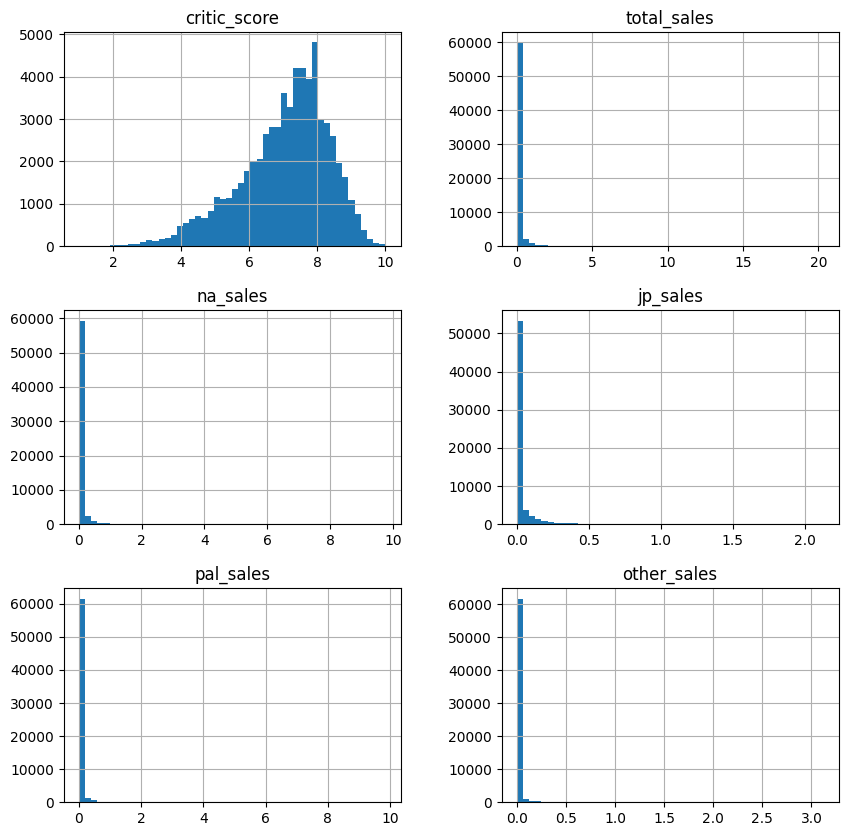

In [29]:
ds.hist(figsize=(10,10),bins=50)
plt.show()

## Tabelul de corelatie

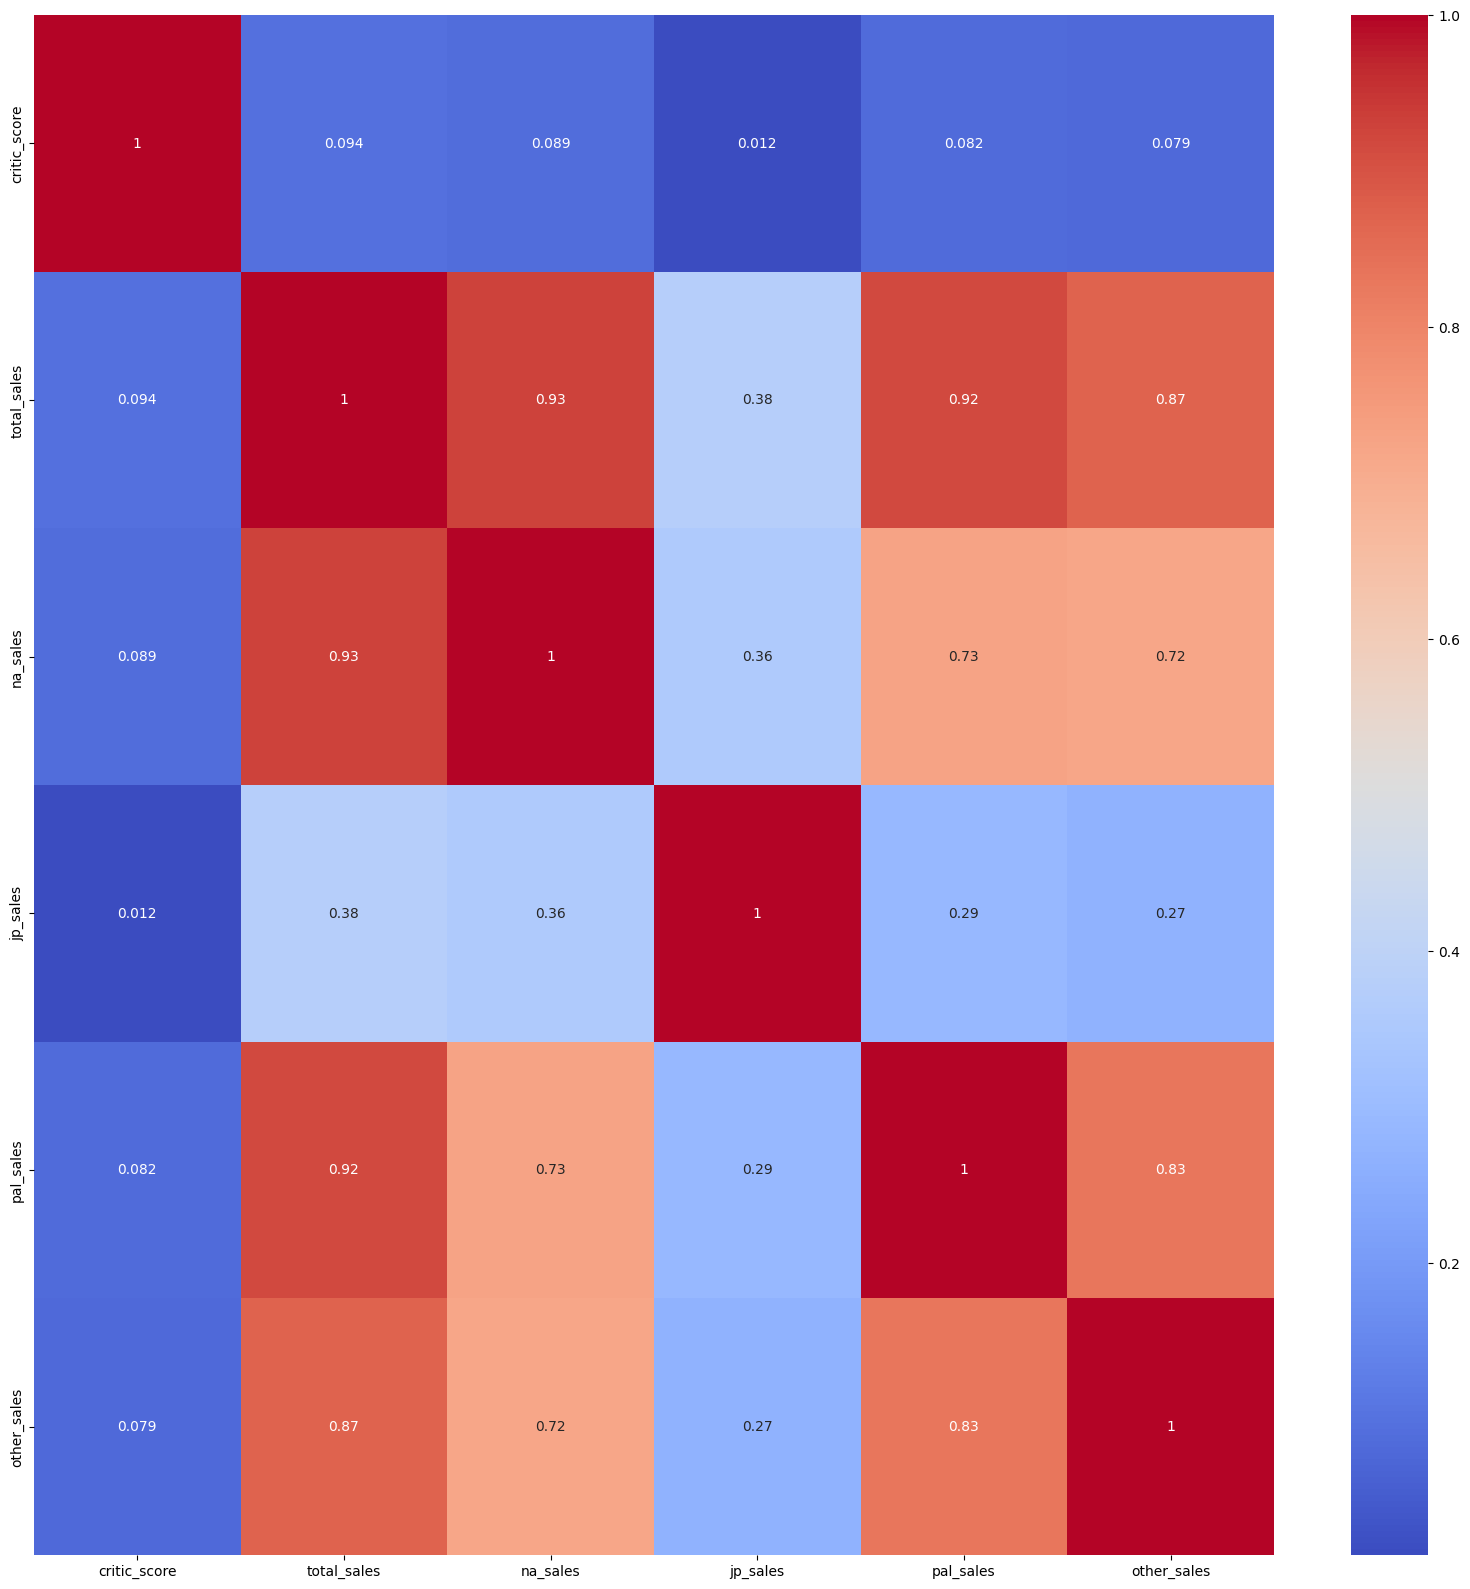

In [30]:
numeric_df = ds.select_dtypes(include=[np.number])

correlation = numeric_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True, cmap='coolwarm')
plt.show()

## Gini Index pentru fiecare coloană numerică

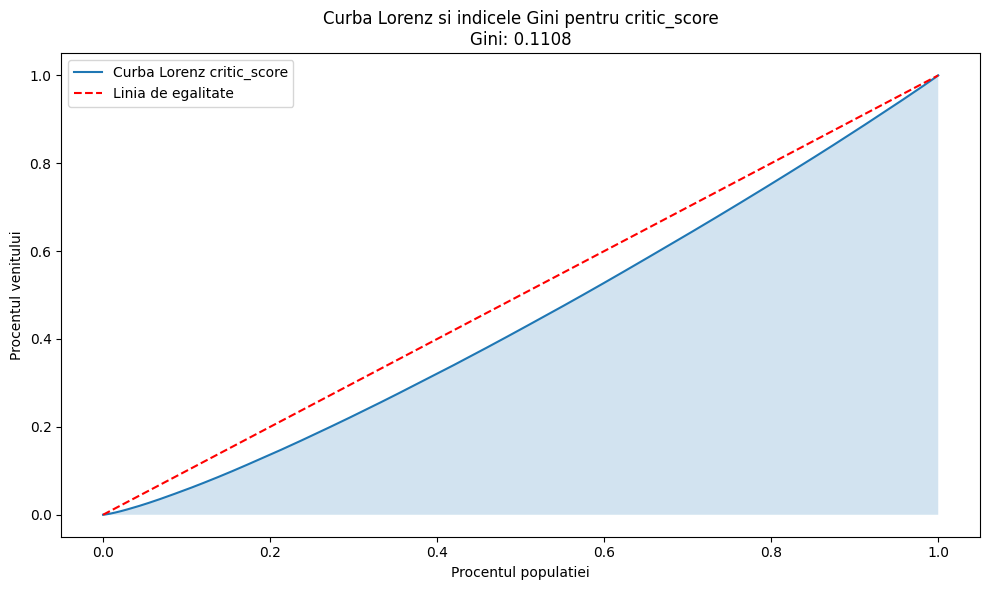

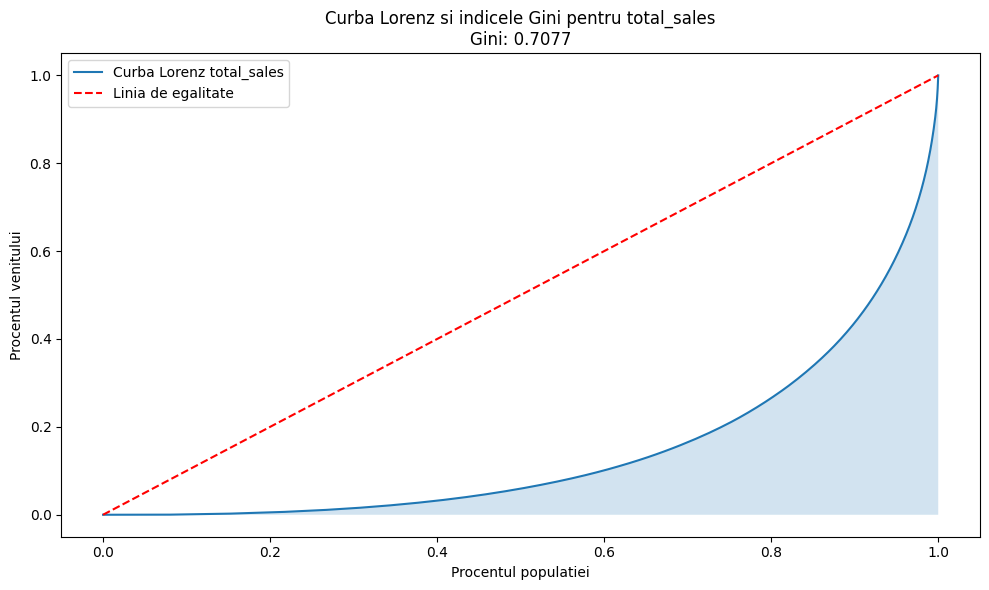

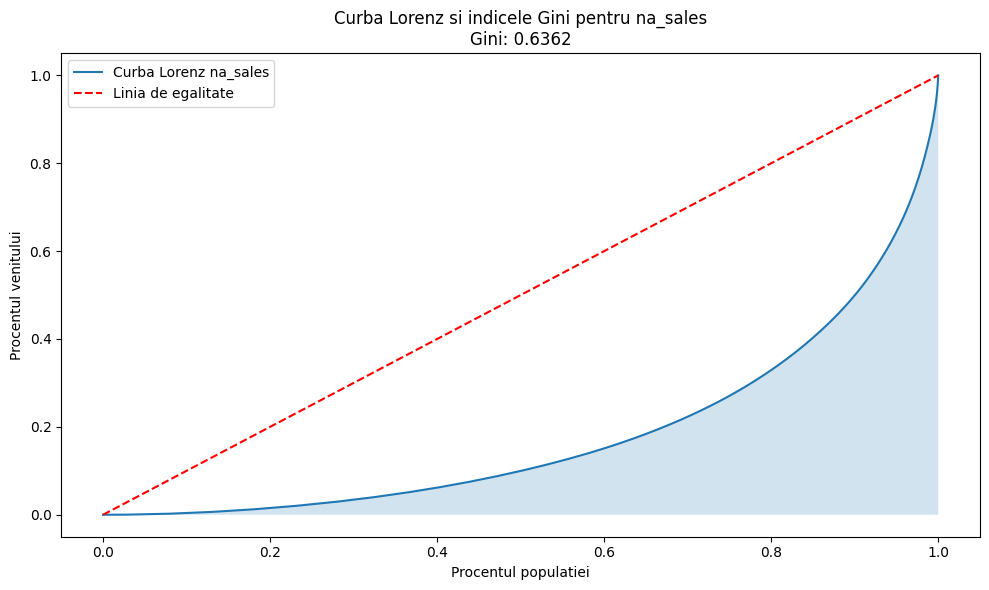

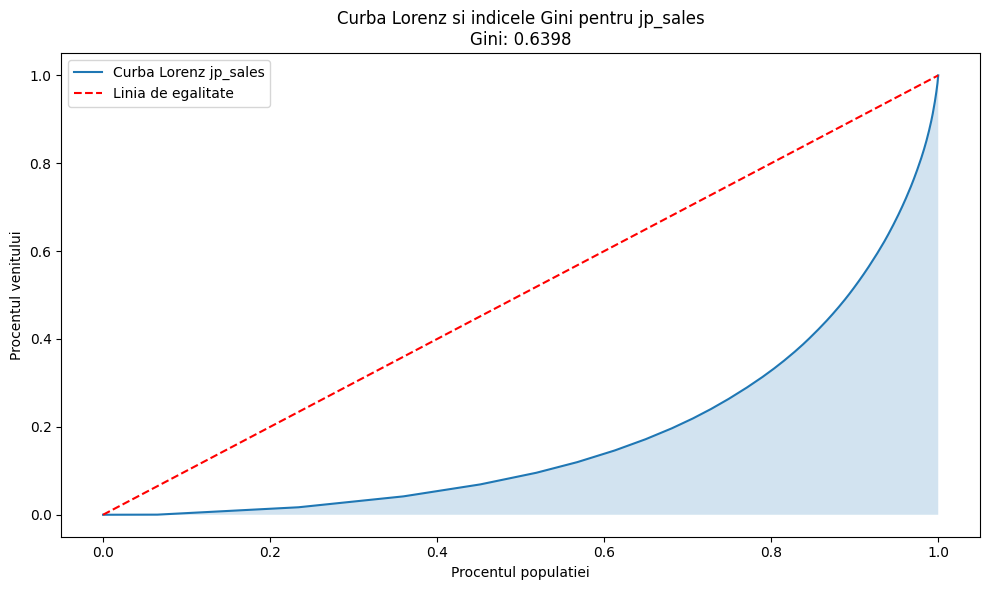

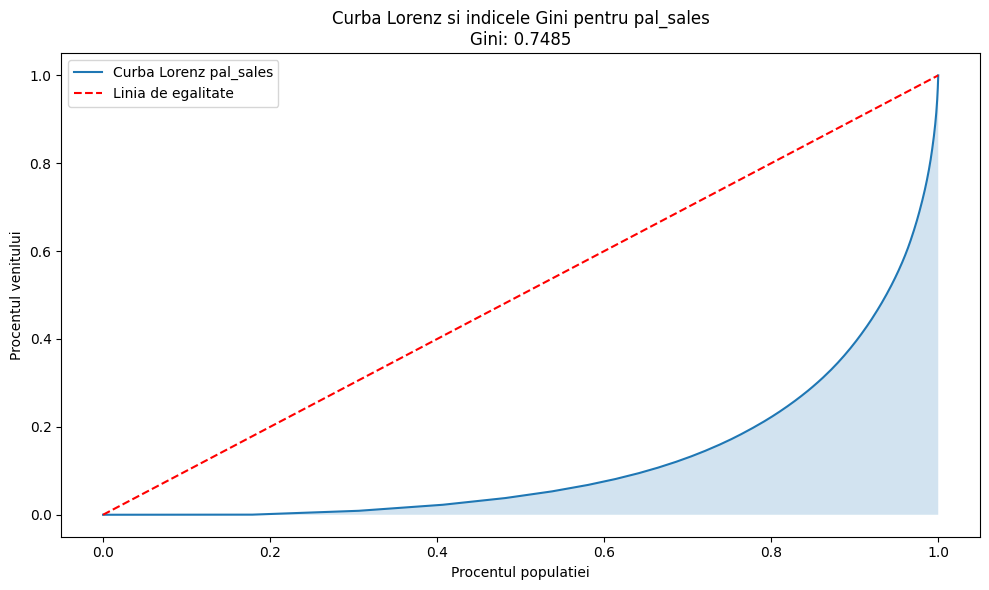

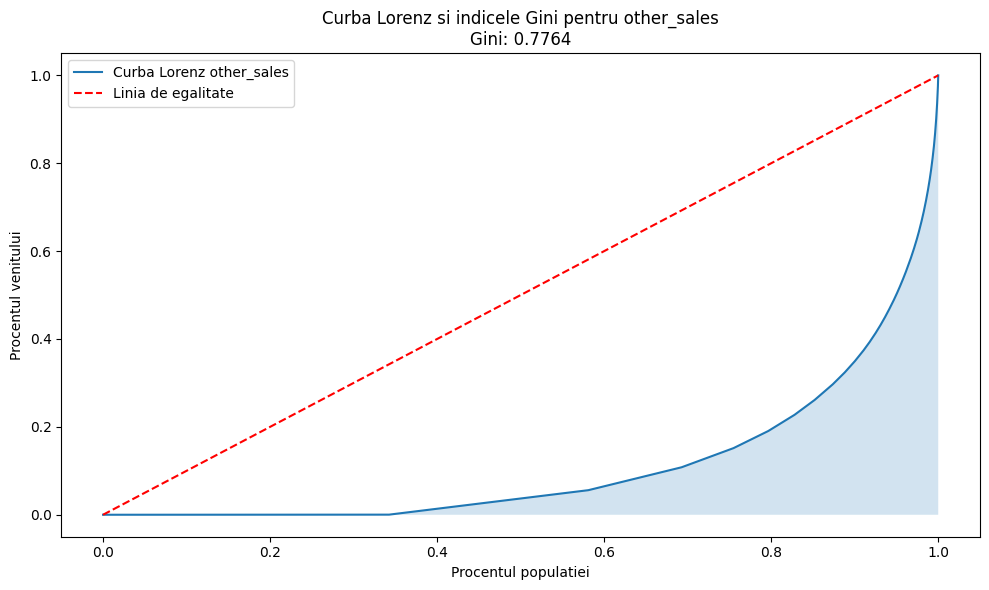

In [34]:
def lorenz_curve(data):
    data = np.sort(data)
    cumulative_values = np.cumsum(data)
    cumulative_values = np.insert(cumulative_values, 0, 0)
    cumulative_values = cumulative_values / cumulative_values[-1]
    gini = 1-2*np.trapezoid(cumulative_values, dx=1/len(data))
    return cumulative_values, gini

df = pd.read_csv('dataset/vgchartz-2024.csv')
numeric_data = df.select_dtypes(include=[np.number])

for column in numeric_data.columns:
    values = numeric_data[column].dropna().values
    cumulative_values, gini = lorenz_curve(values)
    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(0, 1, len(cumulative_values)), cumulative_values, label=f'Curba Lorenz {column}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Linia de egalitate')
    plt.fill_between(np.linspace(0, 1, len(cumulative_values)), cumulative_values, alpha=0.2)
    plt.title(f'Curba Lorenz si indicele Gini pentru {column}\nGini: {gini:.4f}')
    plt.xlabel('Procentul populatiei')
    plt.ylabel('Procentul venitului')
    plt.legend()
    plt.tight_layout()
    plt.show()


 